In [6]:
import pandas as pd
import numpy as np
from sklearn  import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn .preprocessing import StandardScaler
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\1447791504.py:11: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [3]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name='saledata')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [5]:
# Có mối liên hệ nào giữa số lượng đặt hàng QUANTITYORDERED và trạng thái giao hàng STATUS trên từng nhóm kích thước đặt hàng DEALSIZE hay không

from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('QUANTITYORDERED ~ STATUS + DEALSIZE + STATUS:DEALSIZE', data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

                     df         sum_sq       mean_sq           F  \
STATUS              5.0    3562.031394    712.406279    9.980868   
DEALSIZE            2.0   59596.757162  29798.378581  417.477617   
STATUS:DEALSIZE    10.0    4970.156500    497.015650    6.963228   
Residual         2806.0  200284.391006     71.377189         NaN   

                        PR(>F)  
STATUS            1.760303e-09  
DEALSIZE         1.913707e-159  
STATUS:DEALSIZE   7.290926e-11  
Residual                   NaN  


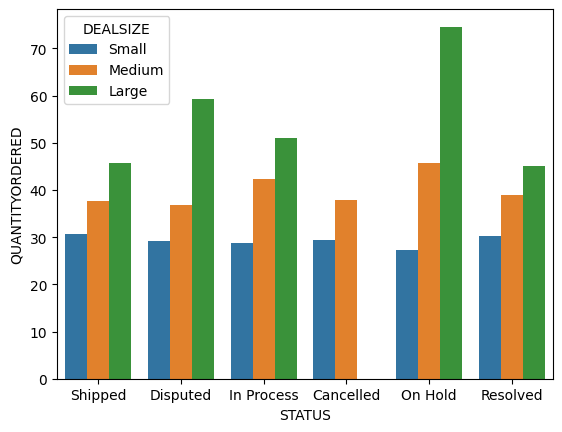

In [10]:
# Hãy cho biết biểu đồ chỉ có 2 cột thuộc nhóm status nào
import seaborn as sns
sns.barplot(data=df, x='STATUS', y='QUANTITYORDERED', hue='DEALSIZE', errorbar=None)
plt.show()

In [14]:
# Có mối liên hệ nào giữa trạng thái giao hàng và kích thước đặt hàng hay không

crosdata = pd.crosstab(df['STATUS'], df['DEALSIZE'], rownames=['STATUS'], colnames=['DEALSIZE'])

stat, p, dof, expected = chi2_contingency(crosdata)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Phụ thuộc (bác bỏ H0)')
else:
    print('Không phụ thuộc (chấp nhận H0)')

p value is 0.0001614574648411617
Phụ thuộc (bác bỏ H0)


In [ ]:
#Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng, nếu có dữ liệu thiếu trên nhóm DEALSIZE = Medium 
#thì dữ liệu thiếu đó nên được thay thế bằng

sns.boxplot(data=df, x='STATUS', y='QUANTITYORDERED', hue='DEALSIZE', errorbar=None)
plt.show()

In [29]:
# Hãy cho biết tổng doanh số đặt hàng ở quốc gia nào nhiều ở vị trí thứ 5
df.groupby('COUNTRY')['SALES'].agg(['sum']).sort_values(by='sum', ascending=False)

,sum
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


In [31]:
# Hãy cho biết mã hóa đơn của đơn hàng có số dòng đặt hàng nhiều nhất

df.groupby('ORDERNUMBER')['ORDERLINENUMBER'].agg(['count']).sort_values(by='count', ascending=False)

,count
ORDERNUMBER,
10316,18
10106,18
10332,18
10386,18
10159,18
...,...
10387,1
10144,1
10118,1


In [32]:
# Calculate mean and standard deviation of the SALES column
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()

# Given Z-Score
z_score = 0.25

# Calculate the original value before normalization
original_value = z_score * std_sales + mean_sales
print(f"The original value before Z-Score normalization is: {original_value}")

The original value before Z-Score normalization is: 4014.3553483443616


In [36]:
# Hãy cho biết kích thước của dữ liệu

print(df.shape)
print(df.shape[0])

(2823, 10)
2823


In [37]:
# Nếu sử dụng One Hot Encoding để số hóa dữ liệu DEALSIZE thì kết quả của dòng cuối cùng là bao nhiêu

from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [43]:
# Nếu sử dụng Min-Max Scaler cho SALES thì giá trị có index từ 50 đên 59 được scale thành bao nhiêu
y = MinMaxScaler().fit_transform(df[['SALES']])[50:60]
print(y)



[[0.5714917 ]
 [0.14223049]
 [0.26896469]
 [0.84693401]
 [0.25104351]
 [0.16997177]
 [0.20775741]
 [0.34636676]
 [0.3334174 ]
 [0.23372378]]


In [44]:
# Calculate skewness before log transformation
original_skewness = stats.skew(df['SALES'])

# Apply log transformation
log_sales = np.log(df['SALES'])

# Calculate skewness after log transformation
log_skewness = stats.skew(log_sales)

print(f"Original skewness: {original_skewness}")
print(f"Log-transformed skewness: {log_skewness}")

# Determine the skewness change
if log_skewness > original_skewness:
    print("a. Lệch nhiều hơn ban đầu")
elif log_skewness < 0 and original_skewness > 0:
    print("b. Lệch ngược chiều với ban đầu")
elif log_skewness > 0 and original_skewness > 0:
    print("c. Lệch cùng chiều với ban đầu")
elif log_skewness < original_skewness:
    print("d. Lệch ít hơn ban đầu")
elif log_skewness == original_skewness:
    print("e. Lệch bằng với ban đầu")
else:
    print("f. Không lệch, tức độ lệch = 0")

Original skewness: 1.160458972499323
Log-transformed skewness: -0.20206679522214474
b. Lệch ngược chiều với ban đầu


In [48]:
# Hãy giá trị lệch của SALES sau khi được transform qua hàm f(x) = 1/(log(x)^2 + 1) rồi sau đó đi qua hàm f(x) = sqrt(x)

original_sales_skew = stats.skew(df['SALES'])

caculated_sales = np.sqrt(1 / (np.log(df['SALES']) ** 2 + 1))

caculated_sales_skew = stats.skew(caculated_sales)

print(f'original: {original_sales_skew}')
print(f'caculated: {caculated_sales_skew}')
print(f'độ lệch: {np.abs(caculated_sales_skew - original_sales_skew)}')


original: 1.160458972499323
caculated: 0.5659624607534838
độ lệch: 0.5944965117458393


In [46]:
#Hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm
quantity_ordered_skewness = stats.skew(df['SALES'])

print(f"Skewness of QUANTITYORDERED: {quantity_ordered_skewness}")

Skewness of QUANTITYORDERED: 1.160458972499323


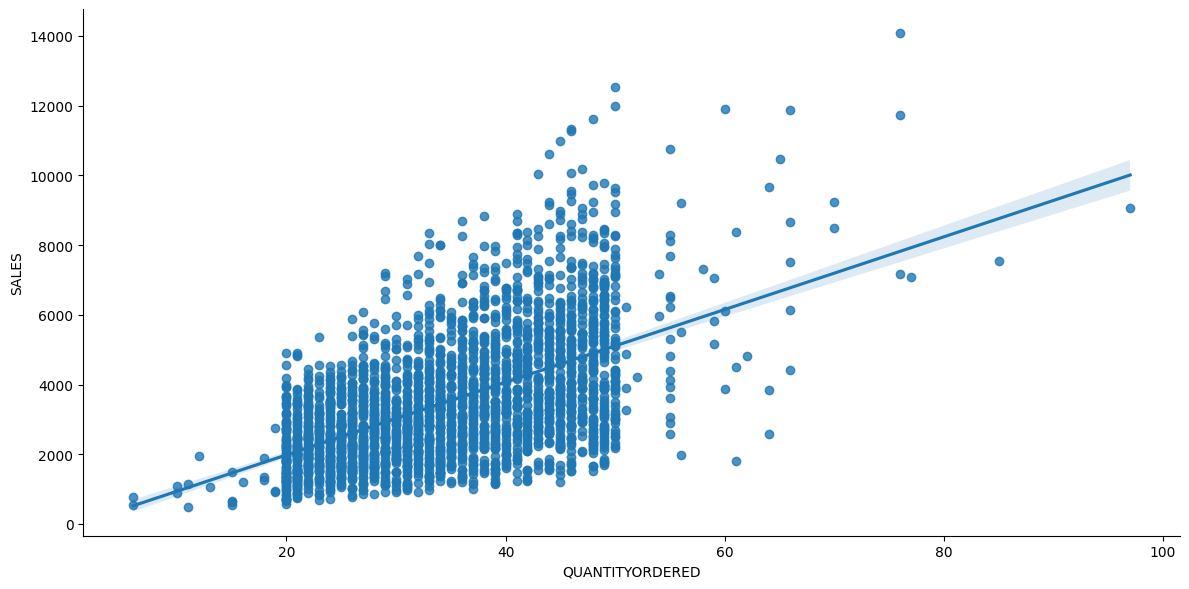

In [47]:
# Linear correlation plot between two columns, e.g., 'SALES' and 'QUANTITYORDERED'

xlabel = 'QUANTITYORDERED'
ylabel = 'SALES'

sns.lmplot(data=df, x=xlabel, y=ylabel, aspect=2, height=6)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [54]:
# Calculate the percentage of each DEALSIZE
# dealsize_counts = df['DEALSIZE'].value_counts(normalize=True) * 100
# dealsize_percentages = dealsize_counts.sort_index()

# # Print the percentages
# print(dealsize_percentages)

# # Determine the closest match from the given options
# small, medium, large = dealsize_percentages['Small'], dealsize_percentages['Medium'], dealsize_percentages['Large']
# print(f"[Small, Medium, Large] = [{small:.1f}, {medium:.1f}, {large:.1f}]")

# Hãy cho biết phần trăm số lượng sản phẩm theo kích thước đặt hàng
df.groupby('DEALSIZE').agg(['count'])

print((157 / 2823) * 100)
print((1384 / 2823) * 100)
print((1282 / 2823) * 100)

5.561459440311725
49.02585901523202
45.41268154445625
